In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import zipfile
import os
import re
from collections import Counter
from bs4 import BeautifulSoup

In [31]:
df = pd.read_csv("combined_data.csv")

In [32]:
df.drop(columns=["zarobki", "Unnamed: 0"])

,zarobki_min,zarobki_max,nazwa,miasto,zdalnie
0,Brak danych,Brak danych,Junior PHP/JS Developer - Tech Support,Warszawa,Nie
1,Brak danych,Brak danych,Płatny staż programistyczny,Kraków,Nie
2,Brak danych,Brak danych,"Support Team Leader (Incident, Problem, Change...",Kraków,Nie
3,Brak danych,Brak danych,Java Developer,Warszawa,Nie
4,20000,28000,Senior Node.js Developer,Nie podano,Tak
...,...,...,...,...,...
10607,Brak danych,Brak danych,Full Stack Machine Learning Developer,Warszawa,Nie
10608,10 000,18 000,Python Django Developer,Poznań,Tak
10609,10 000,20 000,AI Engineer,Warszawa,Tak
10610,18 000,20 500,Python Developer with SQL,Warszawa,Nie


In [33]:
df.drop(df[df.zarobki_min == "Brak danych"].index, inplace=True)
df


,zarobki_min,zarobki_max,nazwa,miasto,zdalnie,Unnamed: 0,zarobki
4,20000,28000,Senior Node.js Developer,Nie podano,Tak,NaN,NaN
9,7000,10000,Programista APS.net / MS VBA,Warszawa,Tak,NaN,NaN
10,10000,14000,Test Automation Engineer II - Signing bonus El...,Nie podano,Tak,NaN,NaN
15,10000,14000,Java Software Engineer II - Signing Bonus Elig...,Nie podano,Tak,NaN,NaN
18,10460,20160,Ruby Developer,Nie podano,Tak,NaN,NaN
...,...,...,...,...,...,...,...
10606,16 000,28 000,Data Scientist,Wrocław,Nie,NaN,NaN
10608,10 000,18 000,Python Django Developer,Poznań,Tak,NaN,NaN
10609,10 000,20 000,AI Engineer,Warszawa,Tak,NaN,NaN
10610,18 000,20 500,Python Developer with SQL,Warszawa,Nie,NaN,NaN


In [34]:
df[df["nazwa"].str.contains("Python")]

,zarobki_min,zarobki_max,nazwa,miasto,zdalnie,Unnamed: 0,zarobki
917,16800,25200,Python Developer (in fintech industry) (EU can...,Nie podano,Tak,NaN,NaN
952,11000,18000,Python Developer,Nie podano,Tak,NaN,NaN
1669,10 000,16 000,Embedded C & Python Developer,Nie podano,Tak,5.0,NaN
1689,10 000,16 000,Embedded C & Python Developer,Nie podano,Tak,25.0,NaN
1709,10 000,16 000,Embedded C & Python Developer,Nie podano,Tak,45.0,NaN
...,...,...,...,...,...,...,...
10601,24 000,30 000,Lead Core Python Engineer,Warszawa,Tak,NaN,NaN
10602,14 000,19 000,Python Developer,Kraków,Nie,NaN,NaN
10608,10 000,18 000,Python Django Developer,Poznań,Tak,NaN,NaN
10610,18 000,20 500,Python Developer with SQL,Warszawa,Nie,NaN,NaN


In [35]:
df[df.miasto == "Poznań"]

,zarobki_min,zarobki_max,nazwa,miasto,zdalnie,Unnamed: 0,zarobki
3945,4 000,7 000,Programista PHP / Full Stack Developer,Poznań,Tak,NaN,NaN
3961,4 500,7 500,Junior PHP/JS Developer,Poznań,Nie,NaN,NaN
3970,8 000,16 000,Backend PHP Developer,Poznań,Nie,NaN,NaN
3998,NaN,NaN,Płatny staż - PHP/JS Intern,Poznań,Nie,NaN,NaN
4003,16 000,24 000,PHP Developer (mid / senior),Poznań,Tak,NaN,NaN
...,...,...,...,...,...,...,...
10542,15 000,19 000,Senior Supply Chain Data Engineer,Poznań,Tak,NaN,NaN
10564,6 000,11 500,C/Python Developer,Poznań,Nie,NaN,NaN
10565,6 000,11 500,Docker developer,Poznań,Nie,NaN,NaN
10589,15 500,22 000,Senior Python Developer,Poznań,Tak,NaN,NaN


In [36]:
def read_shape_from_zip(zip_filename, entry_name_regex):
    z = zipfile.ZipFile(zip_filename, mode="r")
    dbf_name = list(filter(
        lambda x: re.match(entry_name_regex + r'.*\.dbf$',
                           os.path.basename(x)),
        z.namelist()
    ))[0]
    z.close()
    return geopandas.read_file(dbf_name, encoding='utf-8', vfs='zip://'+zip_filename)

In [37]:
wojewodztwa = read_shape_from_zip("Wojewodztwa.zip", "Województwa")

/home/jonasz/.local/lib/python3.8/site-packages/fiona/env.py:408: FionaDeprecationWarning: The vfs keyword argument is deprecated. Instead, pass a URL that uses a zip or tar (for example) scheme.
  return f(*args, **kwargs)


<AxesSubplot:>

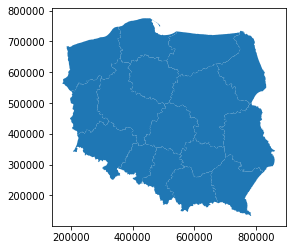

In [38]:
wojewodztwa.plot()

In [39]:
lista_miast = []
for miasta in df.miasto.to_list():
    if ("+" in miasta):
        lista_miast.append(miasta.split("+")[0].split(",")[0].strip().upper())
    elif "," in miasta:
        for miasto in miasta.split(","):
            lista_miast.append(miasto.strip().upper())
    elif (miasta == "Nie podano"):
        pass

    else:
        lista_miast.append(miasta.upper())

len(lista_miast)

7070

In [40]:
for miasto in lista_miast:
    if "SUCHY LAS" in miasto:
        lista_miast.remove(miasto)
        lista_miast.append("Poznań".upper())
    if "WARSAW" in miasto:
        lista_miast.remove(miasto)
        lista_miast.append("WARSZAWA")

In [41]:
zbior_miast = set(lista_miast)

In [42]:
len(zbior_miast)

144

In [43]:
zbior_miast

{'AMSTERDAM',
 'ANIF',
 'ATENY',
 'ATLANTA',
 'AUSTIN',
 'BARCELONA',
 'BATH',
 'BERLIN',
 'BIAŁYSTOK',
 'BIELSKO-BIAŁA',
 'BOCA RATON',
 'BOSTON',
 'BRATISLAVA',
 'BRNO',
 'BRUKSELA',
 'BUDAPEST',
 'BYDGOSZCZ',
 'CARY',
 'CHORZÓW',
 'CZĘSTOCHOWA',
 'DALLAS',
 'DENVER',
 'DUBAJ',
 'DUBLIN',
 'DĄBROWA GÓRNICZA',
 'ESCH-SUR-ALZETTE',
 'FULLY REMOTE',
 'GDAŃSK',
 'GDYNIA',
 'GENEWA',
 'GENT',
 'GLIWICE',
 'GRODZISK MAZOWIECKI',
 'GŻIRA',
 'HELSINKI',
 'HINXTON',
 'IXELLES',
 'JASIONKA',
 'JELCZ LASKOWICE',
 'KALISZ',
 'KATOWICE',
 'KEMPTEN (ALLGÄU)',
 'KIELCE',
 'KNURÓW',
 'KOMORNIKI',
 'KRAKAU',
 'KRAKOW',
 'KRAKÓW',
 'LEGNICA',
 'LEIPZIG',
 'LIMASSOL',
 'LIMERICK',
 'LISBOA',
 'LONDON',
 'LONDYN',
 'LOS ANGELES',
 'LUBLIN',
 'LUMEN',
 'MADRID',
 'MADRYT',
 'MARKI',
 'MEDIOLAN',
 'MELBOURNE',
 'MILAN',
 'MILANO',
 'MYSŁOWICE',
 'MÜNCHEN',
 'NASHVILLE',
 'NEW YORK',
 'NICOSIA',
 'NIEMCZ',
 'NIŠ',
 'OPOLE',
 'OSLO',
 'OSTRÓW WIELKOPOLSKI',
 'OTTAWA',
 'PABIANICE',
 'PARIS',
 'PARK WEST',
 

In [44]:
ilosc_ofert_na_miasto = Counter(lista_miast)

In [45]:
ilosc_ofert_na_miasto

Counter({'WARSZAWA': 2148,
         'GDAŃSK': 406,
         'WROCŁAW': 964,
         'KRAKÓW': 1071,
         'KATOWICE': 480,
         'ŁÓDŹ': 348,
         'OPOLE': 14,
         'KIELCE': 67,
         'KRAKOW': 41,
         'RZESZÓW': 64,
         'GDYNIA': 79,
         'BIAŁYSTOK': 132,
         'LUBLIN': 139,
         'SZTOKHOLM': 12,
         'GŻIRA': 6,
         'POZNAŃ': 390,
         'TBILISI': 6,
         'ZIELONA GÓRA': 58,
         'BYDGOSZCZ': 54,
         'CZĘSTOCHOWA': 35,
         'GLIWICE': 140,
         'BERLIN': 20,
         'KEMPTEN (ALLGÄU)': 2,
         'PARYŻ': 8,
         'ULM': 6,
         'SZCZECIN': 65,
         'BIELSKO-BIAŁA': 22,
         'PŁOCK': 3,
         'SOSNOWIEC': 1,
         'PIŁA': 5,
         'OSTRÓW WIELKOPOLSKI': 3,
         'ATENY': 2,
         'LIMASSOL': 5,
         'ANIF': 3,
         'SALZBURG': 3,
         'PABIANICE': 1,
         'PIEŃKÓW': 1,
         'ZABIERZÓW': 5,
         'SZCZAWNO-ZDRÓJ': 1,
         'STAROGARD GDAŃSKI': 1,
       

In [46]:
with open("miasta.html") as miasta:
    soup = BeautifulSoup(miasta, "html.parser")

role = soup.find_all("tr", {"role":"row"})

lista_miast = []
for i in range(1, len(role)):
    dict = {"miasto" : role[i].find_all("a")[0].text.strip().upper(), "wojewodztwo" : role[i].find_all("a")[2].text.strip().upper()}
    lista_miast.append(dict)

df = pd.DataFrame(lista_miast)
df['ilosc'] = 0
df

,miasto,wojewodztwo,ilosc
0,KAMIENIEC ZĄBKOWICKI,DOLNOŚLĄSKIE,0
1,WLEŃ,DOLNOŚLĄSKIE,0
2,LUBOMIERZ,DOLNOŚLĄSKIE,0
3,PRUSICE,DOLNOŚLĄSKIE,0
4,WIĄZÓW,DOLNOŚLĄSKIE,0
...,...,...,...
959,ŚWINOUJŚCIE,ZACHODNIOPOMORSKIE,0
960,KOŁOBRZEG,ZACHODNIOPOMORSKIE,0
961,STARGARD,ZACHODNIOPOMORSKIE,0
962,KOSZALIN,ZACHODNIOPOMORSKIE,0


In [47]:
# # ilosc_ofert_na_miasto.get("WLEŃ")
# # for miasto in ilosc_ofert_na_miasto.keys():
# #     df.loc(df["miasto"] == miasto)

# for row in df.itertuples(index=True, name='Pandas'):
#     # print(row.miasto, row.wojewodztwo, row.ilosc)
#     if row.miasto in ilosc_ofert_na_miasto.keys():
#         df.at[row, "ilosc"] = ilosc_ofert_na_miasto.get(row.miasto)



In [48]:
# for i, row in df.iterrows():
#     # print('index: ', i, 'ilosc:', row['ilosc'])
#     if row.miasto in ilosc_ofert_na_miasto.keys():
#         df.at[row.miasto, "ilosc"] = ilosc_ofert_na_miasto.get(row.miasto)
#         # print(row.miasto)
# df

In [49]:
df.loc[df['miasto'] == 'WARSZAWA', 'ilosc'] = 10

In [51]:
for miasto in ilosc_ofert_na_miasto.keys():
    df.loc[df['miasto'] == miasto, 'ilosc'] = ilosc_ofert_na_miasto.get(miasto)

In [52]:
df

,miasto,wojewodztwo,ilosc
0,KAMIENIEC ZĄBKOWICKI,DOLNOŚLĄSKIE,0
1,WLEŃ,DOLNOŚLĄSKIE,0
2,LUBOMIERZ,DOLNOŚLĄSKIE,0
3,PRUSICE,DOLNOŚLĄSKIE,0
4,WIĄZÓW,DOLNOŚLĄSKIE,0
...,...,...,...
959,ŚWINOUJŚCIE,ZACHODNIOPOMORSKIE,0
960,KOŁOBRZEG,ZACHODNIOPOMORSKIE,0
961,STARGARD,ZACHODNIOPOMORSKIE,0
962,KOSZALIN,ZACHODNIOPOMORSKIE,0


In [53]:
df = df.drop(df[df.ilosc == 0].index)

In [54]:
df

,miasto,wojewodztwo,ilosc
31,SZCZAWNO-ZDRÓJ,DOLNOŚLĄSKIE,1
49,SIECHNICE,DOLNOŚLĄSKIE,1
85,ŚWIDNICA,DOLNOŚLĄSKIE,1
89,LEGNICA,DOLNOŚLĄSKIE,1
90,WAŁBRZYCH,DOLNOŚLĄSKIE,1
91,WROCŁAW,DOLNOŚLĄSKIE,964
143,TORUŃ,KUJAWSKO-POMORSKIE,8
144,BYDGOSZCZ,KUJAWSKO-POMORSKIE,54
195,LUBLIN,LUBELSKIE,139
238,ZIELONA GÓRA,LUBUSKIE,58


In [77]:
wojewodztwa['JPT_NAZWA_'] = wojewodztwa['JPT_NAZWA_'].str.upper()
wojewodztwa.rename(columns={"JPT_NAZWA_" : "wojewodztwo"}, inplace=True)
wojewodztwa

,JPT_SJR_KO,JPT_KOD_JE,wojewodztwo,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,WOJ,24,ŚLĄSKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,24,None,None,UZG,0,1331323,None,12.136952,1.557335,"MULTIPOLYGON (((494179.526 358814.295, 494173...."
1,WOJ,16,OPOLSKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,16,None,None,UZG,0,1331326,None,9.005207,1.196205,"POLYGON ((417001.841 369554.248, 417005.901 36..."
2,WOJ,26,ŚWIĘTOKRZYSKIE,None,0,2012-09-26,None,2012-09-26,None,None,...,26,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((549668.108 320839.847, 549676.668 32..."
3,WOJ,22,POMORSKIE,None,0,2020-04-09,None,2012-09-26,None,None,...,22,None,None,UZG,0,1358902,None,13.167595,2.520630,"POLYGON ((414159.332 769636.478, 414269.395 76..."
4,WOJ,20,PODLASKIE,None,0,2019-03-21,None,2012-09-26,None,None,...,20,None,None,UZG,0,1353685,None,11.101166,2.718484,"POLYGON ((700075.252 572284.982, 700055.491 57..."
5,WOJ,32,ZACHODNIOPOMORSKIE,None,0,2020-04-24,None,2012-09-26,None,None,...,32,None,None,UZG,0,1358951,None,12.137158,3.107549,"POLYGON ((225874.333 694332.554, 231446.660 69..."
6,WOJ,02,DOLNOŚLĄSKIE,None,0,2018-09-25,None,2012-09-26,None,None,...,02,None,None,UZG,0,1348257,None,13.844520,2.559175,"POLYGON ((229358.510 402830.704, 229362.963 40..."
7,WOJ,30,WIELKOPOLSKIE,None,0,2020-12-08,None,2012-09-26,None,None,...,30,None,None,UZG,0,1359173,None,18.408184,3.932195,"POLYGON ((347736.460 606210.458, 347736.779 60..."
8,WOJ,18,PODKARPACKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,18,None,None,UZG,0,1331325,None,11.220452,2.235693,"POLYGON ((713790.986 331036.437, 713798.945 33..."
9,WOJ,12,MAŁOPOLSKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,12,None,None,UZG,0,1331327,None,11.428657,1.898506,"POLYGON ((568911.289 294804.269, 568909.081 29..."


In [80]:
wojewodztwa_ilosc = df.drop(columns="miasto")
wojewodztwa_ilosc = wojewodztwa_ilosc.groupby('wojewodztwo').sum()
wojewodztwa_ilosc

df_wojewodztwa_ilosc = pd.merge(wojewodztwa, wojewodztwa_ilosc, left_on='wojewodztwo', right_index=True)
df_wojewodztwa_ilosc.sort_values('ilosc',ascending=False)
# df_wojewodztwa_ilosc

# df_district_qnty = pd.merge(districts, df_district, left_on='nazwa', right_index=True)
# df_district_qnty.sort_values('ilosc',ascending=False)

,JPT_SJR_KO,JPT_KOD_JE,wojewodztwo,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry,ilosc
12,WOJ,14,MAZOWIECKIE,None,0,2019-03-21,None,2012-09-26,None,None,...,None,None,UZG,0,1353684,None,20.227207,4.689476,"POLYGON ((700396.155 572145.561, 700403.968 57...",2153
9,WOJ,12,MAŁOPOLSKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,None,None,UZG,0,1331327,None,11.428657,1.898506,"POLYGON ((568911.289 294804.269, 568909.081 29...",1075
6,WOJ,02,DOLNOŚLĄSKIE,None,0,2018-09-25,None,2012-09-26,None,None,...,None,None,UZG,0,1348257,None,13.844520,2.559175,"POLYGON ((229358.510 402830.704, 229362.963 40...",969
0,WOJ,24,ŚLĄSKIE,None,0,2017-10-10,None,2012-09-26,None,None,...,None,None,UZG,0,1331323,None,12.136952,1.557335,"MULTIPOLYGON (((494179.526 358814.295, 494173....",691
3,WOJ,22,POMORSKIE,None,0,2020-04-09,None,2012-09-26,None,None,...,None,None,UZG,0,1358902,None,13.167595,2.520630,"POLYGON ((414159.332 769636.478, 414269.395 76...",502
7,WOJ,30,WIELKOPOLSKIE,None,0,2020-12-08,None,2012-09-26,None,None,...,None,None,UZG,0,1359173,None,18.408184,3.932195,"POLYGON ((347736.460 606210.458, 347736.779 60...",399
11,WOJ,10,ŁÓDZKIE,None,0,2012-09-26,None,2012-09-26,None,None,...,None,None,UZG,0,829367,None,12.079404,2.363616,"POLYGON ((569440.120 369049.127, 569457.747 36...",350
14,WOJ,06,LUBELSKIE,None,0,2012-09-26,None,2012-09-26,None,None,...,None,None,UZG,0,829365,None,14.108456,3.232313,"POLYGON ((681015.792 420027.270, 681441.239 42...",139
4,WOJ,20,PODLASKIE,None,0,2019-03-21,None,2012-09-26,None,None,...,None,None,UZG,0,1353685,None,11.101166,2.718484,"POLYGON ((700075.252 572284.982, 700055.491 57...",132
2,WOJ,26,ŚWIĘTOKRZYSKIE,None,0,2012-09-26,None,2012-09-26,None,None,...,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((549668.108 320839.847, 549676.668 32...",67


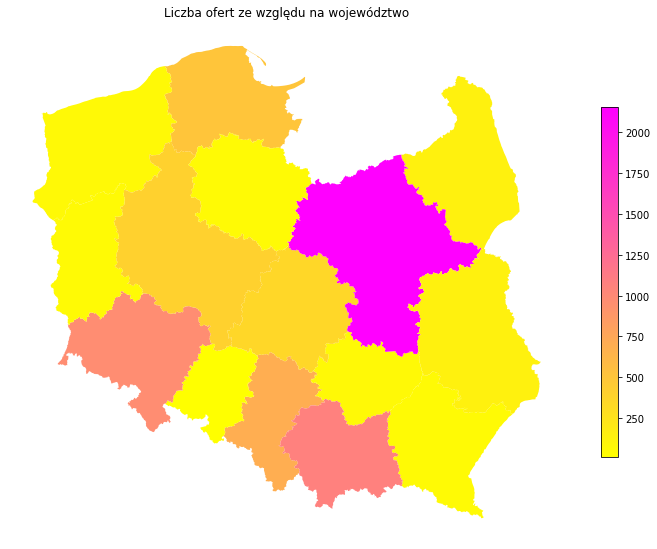

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))
df_wojewodztwa_ilosc.plot(column='ilosc', cmap='spring_r', linewidth=1.5, ax=ax)

vmin, vmax = df_wojewodztwa_ilosc['ilosc'].min(), df_wojewodztwa_ilosc['ilosc'].max()
sm = plt.cm.ScalarMappable(cmap='spring_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, shrink=0.5, ax=ax)

ax.grid(True)
ax.set_axis_off()
ax.set_title("Liczba ofert ze względu na województwo")
plt.tight_layout()
plt.show()